## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

## Loading images

In [2]:
base_dir =  'path to data directory'
folders = os.listdir(base_dir)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250 , 250),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250, 250),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
# Generated Labels

labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}


## Model

### 1. InceptionV3

In [5]:
base_model = tf.keras.applications.InceptionV3(input_shape=(250,250,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

87910968/87910968 [==============================] - 28s 0us/step


In [6]:
base_model.trainable = False

In [7]:
model_inc = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="softmax")
])

model_inc.compile(loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(lr = 0.001) , metrics='accuracy')

In [8]:
model_inc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 3, 3, 2048)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 4)                 73732     
                                                                 
Total params: 21876516 (83.45 MB)
Trainable params: 73732 (288.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [9]:
# Training

hist_inc = model_inc.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 15 ,
          steps_per_epoch = 901/32, # train_files/batch_size
          validation_steps = 224/32, # valid_files/batch_size 
          )

Epoch 1/15
28/28 [==============================] - 36s 1s/step - loss: 1.7069 - accuracy: 0.7203 - val_loss: 0.5571 - val_accuracy: 0.8482
Epoch 2/15
28/28 [==============================] - 37s 1s/step - loss: 0.2504 - accuracy: 0.9412 - val_loss: 0.4358 - val_accuracy: 0.8705
Epoch 3/15
28/28 [==============================] - 42s 1s/step - loss: 0.1304 - accuracy: 0.9623 - val_loss: 0.4648 - val_accuracy: 0.8705
Epoch 4/15
28/28 [==============================] - 43s 2s/step - loss: 0.1259 - accuracy: 0.9578 - val_loss: 0.4239 - val_accuracy: 0.9062
Epoch 5/15
28/28 [==============================] - 44s 2s/step - loss: 0.1015 - accuracy: 0.9645 - val_loss: 0.8881 - val_accuracy: 0.7946
Epoch 6/15
28/28 [==============================] - 43s 2s/step - loss: 0.0776 - accuracy: 0.9789 - val_loss: 0.4072 - val_accuracy: 0.8884
Epoch 7/15
28/28 [==============================] - 47s 2s/step - loss: 0.0730 - accuracy: 0.9789 - val_loss: 0.4657 - val_accuracy: 0.8929
Epoch 8/15
28/28 [==

In [ ]:
# Summarize history for accuracy

plt.plot(hist_inc.history['accuracy'])
plt.plot(hist_inc.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

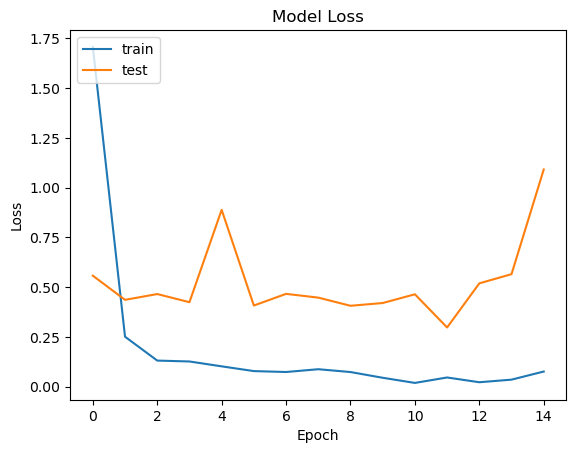

/Users/mruthunjai_govindaraju/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Summarize history for loss

plt.plot(hist_inc.history['loss'])
plt.plot(hist_inc.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_inc.save('wcv.h5')